<a href="https://colab.research.google.com/github/UdayPuligilla/AI-Driven-Insights-Machine-Learning-Models-for-Chronic-Kidney-Disease-Prediction/blob/main/Model_Optimization_and_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Loaded from /content/drive/MyDrive/Chronic kidney disease/datasets/imputed.csv. Shape: (400, 25)
Training set: (320, 24), Test set: (80, 24)

Tuning Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Tuning Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

Tuning K-Nearest Neighbors...
Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

Evaluating Random Forest...
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.98        30

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



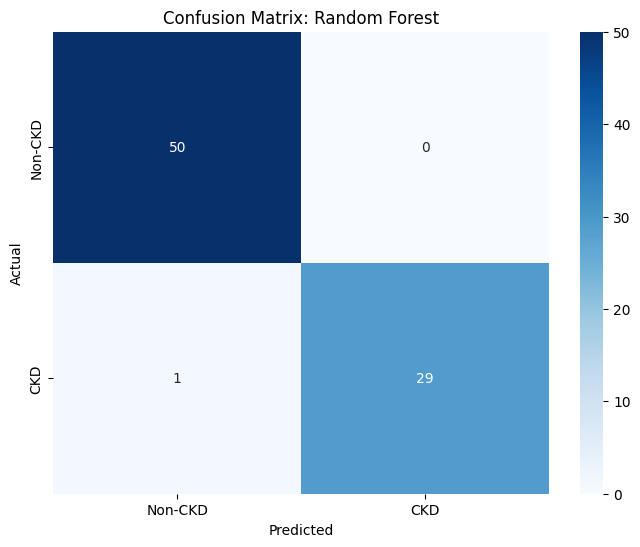

Random Forest Accuracy: 0.9875
Sample Confidence Scores:
[[0.98 0.02]
 [1.   0.  ]
 [0.02 0.98]
 [0.02 0.98]
 [0.07 0.93]]
Model saved as random_forest.pkl

Evaluating Decision Tree...
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.97      0.97      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



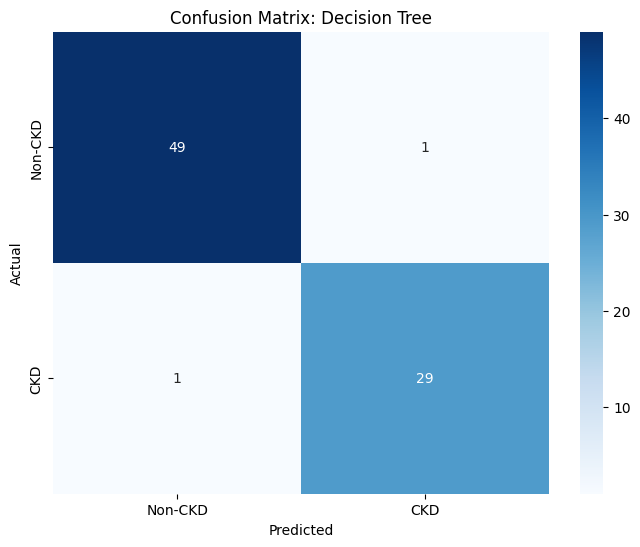

Decision Tree Accuracy: 0.9750
Sample Confidence Scores:
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Model saved as decision_tree.pkl

Evaluating KNN...
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.94      1.00      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



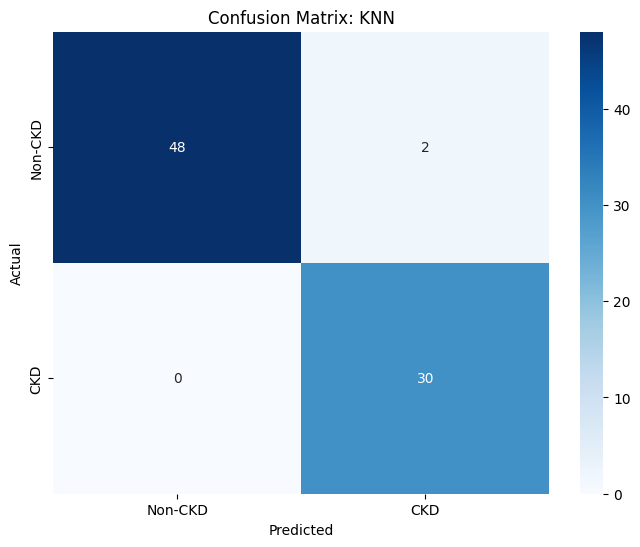

KNN Accuracy: 0.9750
Sample Confidence Scores:
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Model saved as knn.pkl

Tuning Artificial Neural Network...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Learning Rate: 0.001, Validation Accuracy: 0.9750
Learning Rate: 0.01, Validation Accuracy: 0.9875


Learning Rate: 0.1, Validation Accuracy: 0.9750

Best Learning Rate for ANN: 0.01, Accuracy: 0.9875
ANN model saved as ann_model.h5

Model Comparison:


<ipython-input-6-0f9cb96be51b>:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=accuracies, palette="viridis")


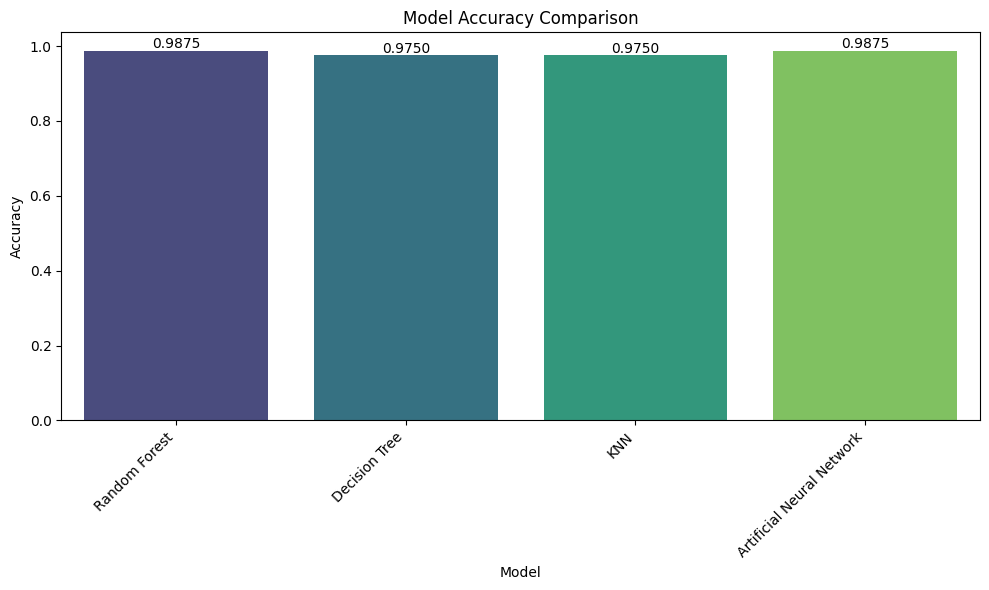

Random Forest: Accuracy = 0.9875
Decision Tree: Accuracy = 0.9750
KNN: Accuracy = 0.9750
Artificial Neural Network: Accuracy = 0.9875


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib  # For saving models
from tensorflow.keras.models import load_model
import os

# File Path for Imputed Dataset
IMPUTED_PATH = '/content/drive/MyDrive/Chronic kidney disease/datasets/imputed.csv'
SAVED_MODELS_PATH = '/content/drive/MyDrive/Chronic kidney disease/saved_models/'

# Load the Imputed Dataset
def load_imputed_data(file_path):
    data = pd.read_csv(file_path)
    print(f"Dataset Loaded from {file_path}. Shape: {data.shape}")
    return data

# Train-Test Split
def split_data(data):
    X = data.drop(columns=['CKD Stage'])
    y = data['CKD Stage']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
    return X_train, X_test, y_train, y_test

# Visualize Confusion Matrix
def plot_confusion_matrix(cm, title, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Save Models
def save_model(model, filename):
    if isinstance(model, Sequential):
        os.makedirs(SAVED_MODELS_PATH, exist_ok=True)
        model.save(SAVED_MODELS_PATH + filename)
        print(f"ANN model saved as {filename}")
    else:  # For sklearn models
        joblib.dump(model, SAVED_MODELS_PATH + filename)
        print(f"Model saved as {filename}")

# Hyperparameter Tuning for Random Forest, Decision Tree, and KNN
def tune_models(X_train, y_train):
    tuned_models = {}

    # Random Forest Tuning
    print("\nTuning Random Forest...")
    rf_params = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
    rf_grid.fit(X_train, y_train)
    print(f"Best Parameters for Random Forest: {rf_grid.best_params_}")
    tuned_models['Random Forest'] = rf_grid.best_estimator_

    # Decision Tree Tuning
    print("\nTuning Decision Tree...")
    dt_params = {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy', n_jobs=-1)
    dt_grid.fit(X_train, y_train)
    print(f"Best Parameters for Decision Tree: {dt_grid.best_params_}")
    tuned_models['Decision Tree'] = dt_grid.best_estimator_

    # KNN Tuning
    print("\nTuning K-Nearest Neighbors...")
    knn_params = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy', n_jobs=-1)
    knn_grid.fit(X_train, y_train)
    print(f"Best Parameters for KNN: {knn_grid.best_params_}")
    tuned_models['KNN'] = knn_grid.best_estimator_

    return tuned_models

# Train and Evaluate ANN
def train_ann(X_train, X_test, y_train, y_test):
    print("\nTuning Artificial Neural Network...")
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    y_train_onehot = to_categorical(y_train_encoded)
    y_test_onehot = to_categorical(y_test_encoded)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    learning_rates = [0.001, 0.01, 0.1]
    best_model = None
    best_accuracy = 0
    best_lr = None

    for lr in learning_rates:
        ann_model = Sequential([
            Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            Dense(8, activation='relu'),
            Dense(2, activation='softmax')  # Output layer for binary classification
        ])
        ann_model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
        ann_model.fit(X_train_scaled, y_train_onehot, epochs=50, batch_size=16, verbose=0)

        _, accuracy = ann_model.evaluate(X_test_scaled, y_test_onehot, verbose=0)
        print(f"Learning Rate: {lr}, Validation Accuracy: {accuracy:.4f}")
        if accuracy > best_accuracy:
            best_model = ann_model
            best_accuracy = accuracy
            best_lr = lr

    print(f"\nBest Learning Rate for ANN: {best_lr}, Accuracy: {best_accuracy:.4f}")
    return best_model, best_accuracy

# Train and Evaluate Models
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    results = {}
    tuned_models = tune_models(X_train, y_train)

    # Evaluate Tuned Models
    for model_name, model in tuned_models.items():
        print(f"\nEvaluating {model_name}...")
        preds = model.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        confidence_scores = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        results[model_name] = accuracy
        print(classification_report(y_test, preds))
        cm = confusion_matrix(y_test, preds)
        plot_confusion_matrix(cm, model_name, ["Non-CKD", "CKD"])
        print(f"{model_name} Accuracy: {accuracy:.4f}")
        if confidence_scores is not None:
            print(f"Sample Confidence Scores:\n{confidence_scores[:5]}")

        # Save the model
        save_model(model, f"{model_name.lower().replace(' ', '_')}.pkl")

    # ANN Tuning and Evaluation
    ann_model, ann_accuracy = train_ann(X_train, X_test, y_train, y_test)
    results["Artificial Neural Network"] = ann_accuracy

    # Save ANN Model
    save_model(ann_model, "ann_model.h5")

    # Compare Results
    print("\nModel Comparison:")
    model_names = list(results.keys())
    accuracies = list(results.values())

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=model_names, y=accuracies, palette="viridis")
    plt.title("Model Accuracy Comparison")
    plt.ylabel("Accuracy")
    plt.xlabel("Model")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()
    for model, accuracy in results.items():
        print(f"{model}: Accuracy = {accuracy:.4f}")

# Main Function
def main():
    # Load the imputed dataset
    data = load_imputed_data(IMPUTED_PATH)

    # Split the data
    X_train, X_test, y_train, y_test = split_data(data)

    # Train and evaluate models
    train_and_evaluate_models(X_train, X_test, y_train, y_test)

# Run the Main Function
if __name__ == "__main__":
    main()
